# CAR BUYING PREDICTION

**(Paramesh.T)**

**About Dataset**:

This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

Columns:

User ID -
Gender -
Age -
Annual Salary -
Purchase Decision (No = 0; Yes = 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Users\PARAMESH\Desktop\ML Projects\projects\Datasets\car_data.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

In [3]:
print(dataset.size)
print(dataset.shape)

5000
(1000, 5)


In [4]:
dataset.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [5]:
dataset.tail(10)

,User ID,Gender,Age,AnnualSalary,Purchased
990,971,Male,25,56500,0
991,382,Female,30,48500,0
992,168,Female,24,67500,0
993,476,Female,54,136500,0
994,951,Female,53,104000,1
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [6]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [7]:
dataset.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 35.2+ KB


In [9]:
dataset.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [10]:
dataset.corr()

,User ID,Age,AnnualSalary,Purchased
User ID,1.000000,0.017647,0.006541,0.015911
Age,0.017647,1.000000,0.166042,0.616036
AnnualSalary,0.006541,0.166042,1.000000,0.364974
Purchased,0.015911,0.616036,0.364974,1.000000


<AxesSubplot:xlabel='count', ylabel='Age'>

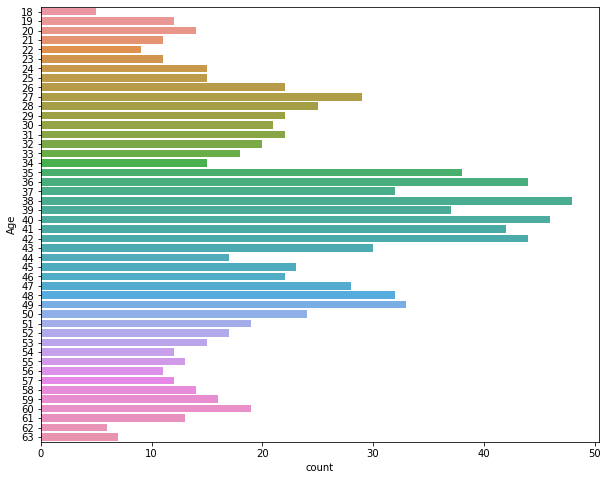

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset,y='Age')

<AxesSubplot:>

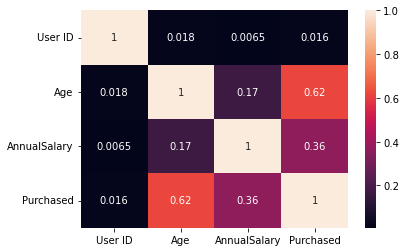

In [12]:
sns.heatmap(dataset.corr(),annot=True)

<AxesSubplot:xlabel='Purchased'>

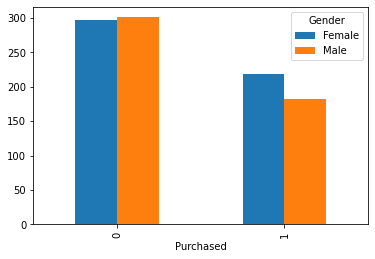

In [13]:
pd.crosstab(dataset.Purchased,dataset.Gender).plot(kind='bar')

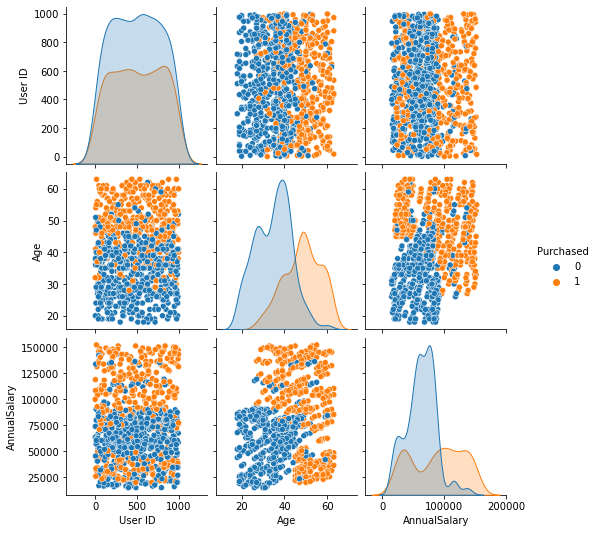

In [14]:
sns.pairplot(dataset,hue = 'Purchased')

Text(0.5, 1.0, 'Age vs AnnualSalary')

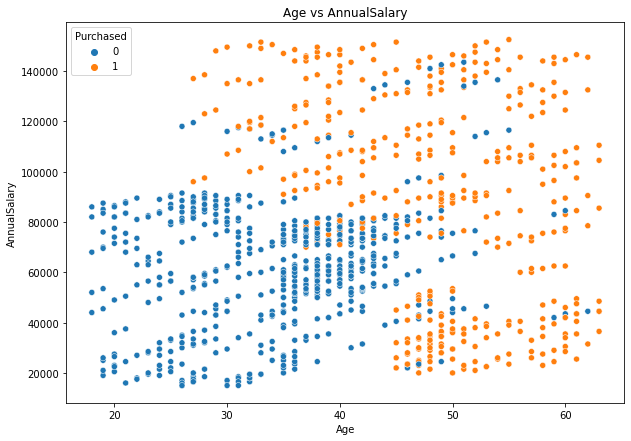

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset,x='Age',y='AnnualSalary',hue='Purchased')
plt.title('Age vs AnnualSalary')

C:\Users\PARAMESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchased', ylabel='Density'>

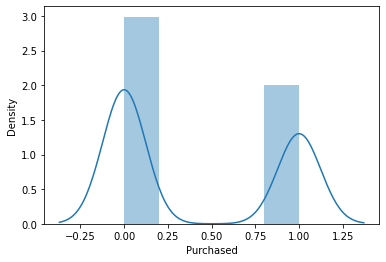

In [16]:
sns.distplot(dataset['Purchased'])

In [17]:
print(X)

[[    35  20000]
 [    40  43500]
 [    49  74000]
 ...
 [    28 138500]
 [    48 134000]
 [    44  73500]]


In [18]:
print(y)

[0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 1 1 0 0 1 

# Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [23]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
logReg_acc = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

[[113   8]
 [ 20  59]]
Accuracy score:  0.86


# Naive_Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
nb_acc= accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

[[113   8]
 [ 14  65]]


0.89

In [27]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# Support Vector Machine

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
svm_acc = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

[[114   7]
 [ 20  59]]


0.865

In [30]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# KNNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
knn_acc = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

[[115   6]
 [  6  73]]


0.94

In [33]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt_acc = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

[[115   6]
 [ 12  67]]


0.91

In [36]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
rf_acc = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

[[113   8]
 [ 10  69]]


0.91

In [39]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# Results

In [42]:
models=pd.DataFrame({'Models':['LogisticRegression', 'Naive_bayes','SVM','KNNeighbors', 'DecisionTree', 'RandomForest'],'Accuracy':[logReg_acc*100,nb_acc*100,svm_acc*100,knn_acc*100,dt_acc*100,rf_acc*100]})
models

,Models,Accuracy
0,LogisticRegression,86.0
1,Naive_bayes,89.0
2,SVM,86.5
3,KNNeighbors,94.0
4,DecisionTree,91.0
5,RandomForest,91.0


C:\Users\PARAMESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

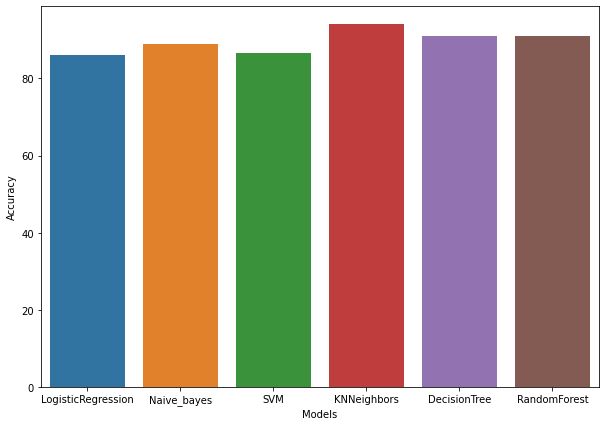

In [43]:
plt.figure(figsize=(10,7))
sns.barplot(models['Models'],models['Accuracy'])

**For this dataset K-nearest neighbors is the suitable model.**

**Using K-Nearest Neighbors model we get 94.0 % Accuracy score**